# 線性迴歸

### 引入套件

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 引入數據

In [2]:
df = pd.read_csv('0050.csv')

In [3]:
df.head()

,Market,50
0,9166.849609,69.451019
1,9234.200195,69.792900
2,9287.769531,70.085953
3,9272.280273,69.841743
4,9284.309570,70.037109


In [4]:
df.describe()

,Market,50
count,240.000000,240.000000
mean,9841.754631,75.345615
std,505.884468,4.835441
min,8931.030273,68.278854
25%,9342.307373,70.916237
50%,9856.350097,74.075001
75%,10331.427735,80.662501
max,10631.570310,83.150002


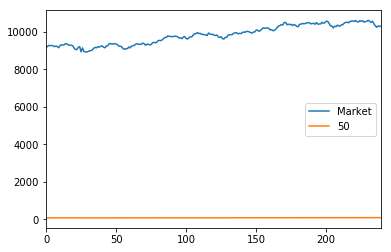

In [5]:
df.plot()

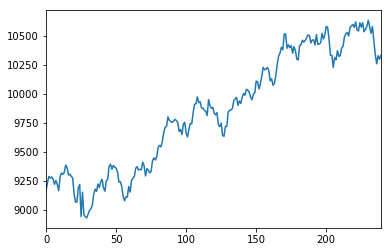

In [6]:
df['Market'].plot()

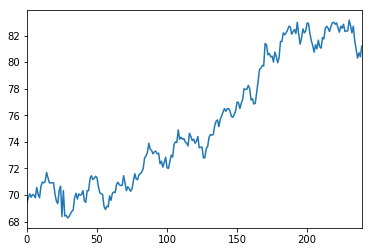

In [7]:
df['50'].plot()

### 相關係數

In [8]:
df['Market'].corr(df['50'])

0.98090993726392572

In [9]:
df['50'].corr(df['Market'])

0.98090993726392572

### 投資報酬率 $$\frac{Price_t - Price_{t-1}}{Price_{t-1}}$$

In [10]:
diff_df = df.diff()/df

In [11]:
diff_df.head()

,Market,50
0,NaN,NaN
1,0.007294,0.004899
2,0.005768,0.004181
3,-0.001670,-0.003497
4,0.001296,0.002789


In [12]:
diff_df.describe()

,Market,50
count,239.000000,239.000000
mean,0.000481,0.000630
std,0.006200,0.006923
min,-0.030663,-0.033571
25%,-0.002682,-0.003369
50%,0.000792,0.000650
75%,0.004146,0.004174
max,0.022834,0.027778


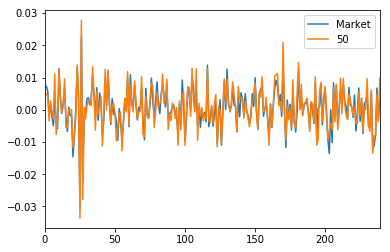

In [13]:
diff_df.plot()

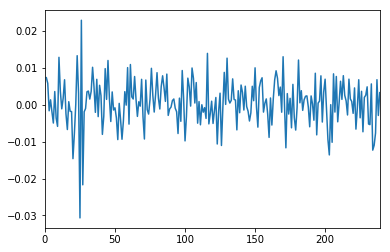

In [14]:
diff_df['Market'].plot()

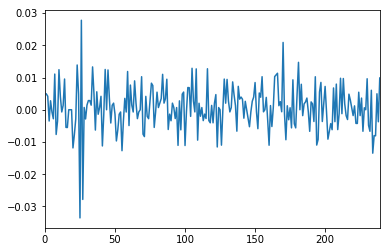

In [15]:
diff_df['50'].plot()

In [16]:
diff_df['Market'].corr(diff_df['50'])

0.93127986541798746

In [17]:
diff_df['50'].corr(diff_df['Market'])

0.93127986541798746

### 回歸方程式 $$y =  a + \beta x$$

### 引入套件

In [18]:
from sklearn import linear_model as lm

### 訓練

In [19]:
lg = lm.LinearRegression()
day_array = np.arange(1,241).reshape(240,1)
market_array = df['Market'].values.reshape((240,1))
fifty_array = df['50'].values.reshape((240,1))
market_diff_array = np.nan_to_num(diff_df['Market'].values.reshape((240,1)))
fifty_diff_array = np.nan_to_num(diff_df['50'].values.reshape((240,1)))

### 預測

In [21]:
lg.fit(day_array, market_array)
print('%s 第 %d 日，價格（預測）：%f' % ('Market', 241, lg.predict(241)))

Market 第 241 日，價格（預測）：10683.342924


In [23]:
lg.fit(day_array, market_diff_array)
print('%s 第 %d 日，投資報酬率（預測）：%f％' % ('Market', 241, lg.predict(241) * 100))

Market 第 241 日，投資報酬率（預測）：0.024242％


In [24]:
lg.fit(day_array, fifty_array)
print('%s 第 %d 日，價格（預測）：%f' % ('0050', 241, lg.predict(241)))

0050 第 241 日，價格（預測）：83.352476


In [25]:
lg.fit(day_array, fifty_diff_array)
print('%s 第 %d 日，價格報酬率（預測）：%f％' % ('0050', 241, lg.predict(241) * 100))

0050 第 241 日，價格報酬率（預測）：0.061486％
